In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer  ## missing values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
import warnings
warnings.simplefilter("ignore")
pd.set_option("display.max_columns", 100)

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
580,581,1,2,"Christy, Miss. Julie Rachel",female,25.0,1,1,237789,30.00,NaN,S
648,649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.55,NaN,S
465,466,0,3,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.05,NaN,S
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.05,NaN,S
714,715,0,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.00,NaN,S


<AxesSubplot:>

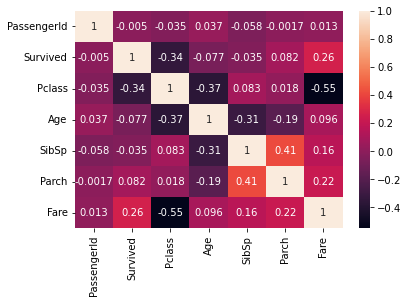

In [6]:
sbn.heatmap(train_data.corr(), annot = True)

In [7]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
train_data.shape

(891, 12)

In [9]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

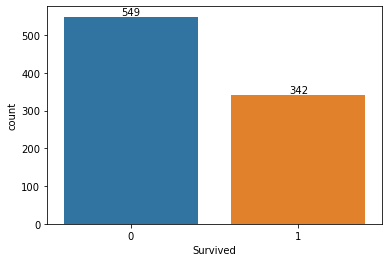

In [11]:
ax = sbn.countplot(x = train_data["Survived"])
ax.bar_label(ax.containers[0]);

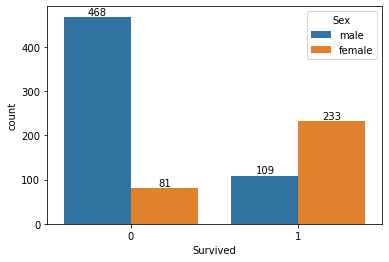

In [12]:
ax = sbn.countplot(x = train_data["Survived"], hue = train_data["Sex"])
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);

In [13]:
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [14]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:
Age_mean = SimpleImputer(missing_values = np.nan, strategy = "mean")
Age = train_data[["Age"]].values
Age_mean = Age_mean.fit(Age[:, :1])
Age[:, :1] = Age_mean.transform(Age[:, :1])

train_data[["Age"]] = Age

In [17]:
train_data = train_data.drop(["Cabin", "Name", "Ticket", "PassengerId"], axis = 1)

In [18]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
y = train_data["Survived"]
x = train_data.drop("Survived", axis = 1)

In [20]:
type(x)

pandas.core.frame.DataFrame

In [21]:
type(y)

pandas.core.series.Series

In [22]:
x.shape, y.shape

((891, 7), (891,))

In [23]:
x = pd.get_dummies(x, drop_first = True)

In [24]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [55]:
def classsification(x, y):
    log = LogisticRegression()
    knn = KNeighborsClassifier(n_neighbors = 5)
    dec = DecisionTreeClassifier(criterion = "log_loss")  #"gini", "entropy", "log_loss"
    gau = GaussianNB()
    ber = BernoulliNB()
    sup = SVC(kernel = "rbf", random_state = 123) # 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
    
    x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 0)
    x_train = MinMaxScaler().fit_transform(x_train)
    x_test = MinMaxScaler().fit_transform(x_test)
    models = [log, knn, dec, gau, ber, sup]
    model_names = ["Logistic", "KNN", "Decision_Tree", "Gaussian", "Bernoulli", "Support_VM"]
    
    acc_score = []
    conf_matrix = []
    
    result = pd.DataFrame(columns = ["Accuracy_Score", "Confusion_Matrix"], index = model_names)
    
    for fit_model in models:
        fit_model.fit(x_train, y_train)
        y_pred = fit_model.predict(x_test)
        acc_score.append(accuracy_score(y_true, y_pred))
        conf_matrix.append(confusion_matrix(y_true, y_pred))
        
    result["Accuracy_Score"] = acc_score
    result["Confusion_Matrix"] = conf_matrix
    
    return result.sort_values("Accuracy_Score", ascending = False)

In [56]:
classsification(x, y)  # logistic and SVM have best score

,Accuracy_Score,Confusion_Matrix
Logistic,0.821229,"[[99, 11], [21, 48]]"
Support_VM,0.821229,"[[105, 5], [27, 42]]"
KNN,0.815642,"[[98, 12], [21, 48]]"
Gaussian,0.804469,"[[90, 20], [15, 54]]"
Bernoulli,0.793296,"[[88, 22], [15, 54]]"
Decision_Tree,0.787709,"[[95, 15], [23, 46]]"
